In [48]:
import requests
import pandas as pd
from datetime import datetime, timedelta

def get_historical_price(symbol, days):
    url = f"https://api.coingecko.com/api/v3/coins/{symbol}/market_chart"
    params = {
        'vs_currency': 'eur',
        'days': days
    }
    response = requests.get(url, params=params)
    data = response.json()
    df_prices = pd.DataFrame(data['prices'], columns=['time', 'price'])
    df_market_caps = pd.DataFrame(data['market_caps'], columns=['time', 'market_cap'])
    df_total_volumes = pd.DataFrame(data['total_volumes'], columns=['time', 'total_volume'])

    df_prices['time'] = pd.to_datetime(df_prices['time'], unit='ms')
    df_market_caps['time'] = pd.to_datetime(df_market_caps['time'], unit='ms')
    df_total_volumes['time'] = pd.to_datetime(df_total_volumes['time'], unit='ms')

    df = pd.merge(df_prices, df_market_caps, on='time')
    df = pd.merge(df, df_total_volumes, on='time')

    return df

# Get the last 10 days of price data for Ethereum
df1 = get_historical_price('ethereum', 10)
print(df1)
# df2 = get_historical_price('bitcoin', 10)
# print(df2)

                       time        price    market_cap  total_volume
0   2024-05-01 18:02:21.739  2735.588440  3.320478e+11  1.819056e+10
1   2024-05-01 19:06:21.100  2787.908375  3.399547e+11  2.056558e+10
2   2024-05-01 20:02:56.448  2727.004793  3.339671e+11  2.070368e+10
3   2024-05-01 21:03:20.730  2744.027070  3.349357e+11  2.002785e+10
4   2024-05-01 22:06:36.457  2775.526777  3.378291e+11  2.067323e+10
..                      ...          ...           ...           ...
236 2024-05-11 14:03:16.395  2702.736092  3.243297e+11  1.048486e+10
237 2024-05-11 15:00:26.997  2695.842802  3.237415e+11  9.389551e+09
238 2024-05-11 16:01:51.620  2715.377245  3.265454e+11  8.549839e+09
239 2024-05-11 17:02:48.946  2710.175920  3.252809e+11  7.759019e+09
240 2024-05-11 17:39:05.000  2712.801274  3.255073e+11  7.125710e+09

[241 rows x 4 columns]


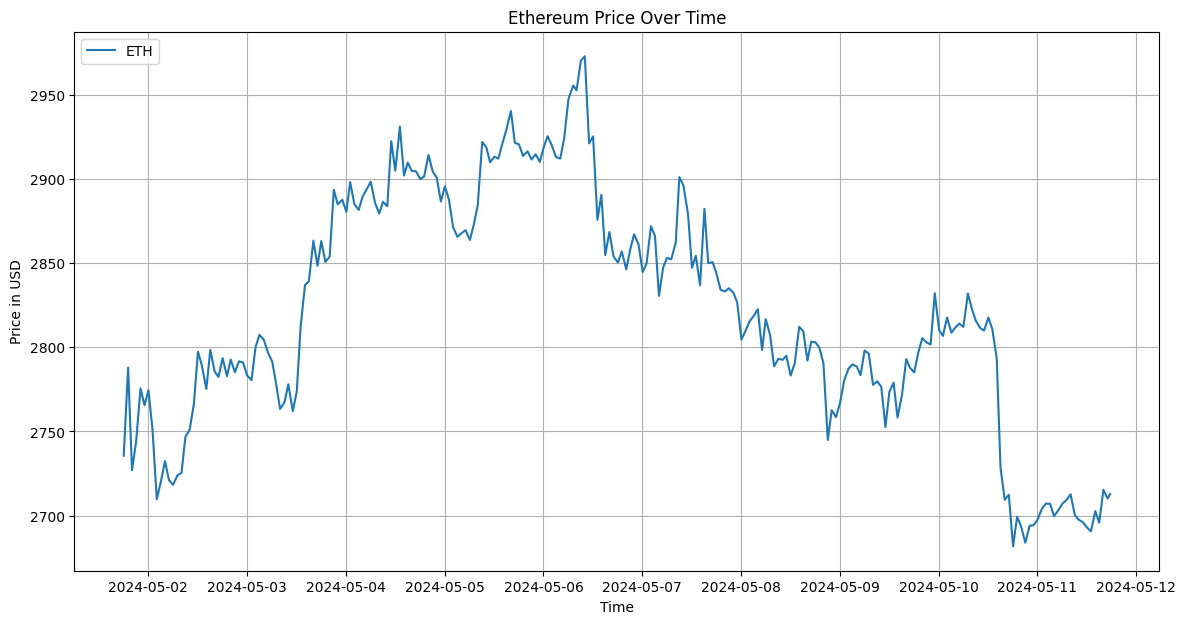

In [49]:
import matplotlib.pyplot as plt

# Your existing code...
# df = get_historical_price('ethereum', 1)

# New code to create a chart
plt.figure(figsize=(14, 7))
plt.plot(df1['time'], df1['price'], label='ETH')
# plt.plot(df2['time'], df2['price'], color='red', label='BTC')  # new line
# plt.plot(df3['time'], df3['price'], color='red', label='ETH')  # new line
plt.legend(loc='upper left')
plt.title('Ethereum Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.grid(True)
plt.show()


In [50]:
def calculate_rolling_average(df, window_size):
    df['rolling_avg_price'] = df['price'].rolling(window=window_size).mean()
    return df

window_size = 10
df1_rolling = calculate_rolling_average(df1, window_size)
# df2 = calculate_rolling_average(df2, window_size)

print(dfs)
# print(df2)


                       time        price    market_cap  total_volume  \
0   2024-05-01 17:04:55.978  2708.331025  3.305720e+11  1.705077e+10   
1   2024-05-01 18:02:21.739  2735.588440  3.320478e+11  1.819056e+10   
2   2024-05-01 19:06:21.100  2787.908375  3.399547e+11  2.056558e+10   
3   2024-05-01 20:02:56.448  2727.004793  3.339671e+11  2.070368e+10   
4   2024-05-01 21:03:20.730  2744.027070  3.349357e+11  2.002785e+10   
..                      ...          ...           ...           ...   
236 2024-05-11 13:00:28.873  2690.716711  3.228058e+11  1.066513e+10   
237 2024-05-11 14:03:16.395  2702.736092  3.243297e+11  1.048486e+10   
238 2024-05-11 15:00:26.997  2695.842802  3.237415e+11  9.389551e+09   
239 2024-05-11 16:01:51.620  2715.377245  3.265454e+11  8.549839e+09   
240 2024-05-11 16:47:27.000  2715.068243  3.257565e+11  7.780334e+09   

     rolling_avg_price  bearish_double_top  
0                  NaN               False  
1                  NaN               False  


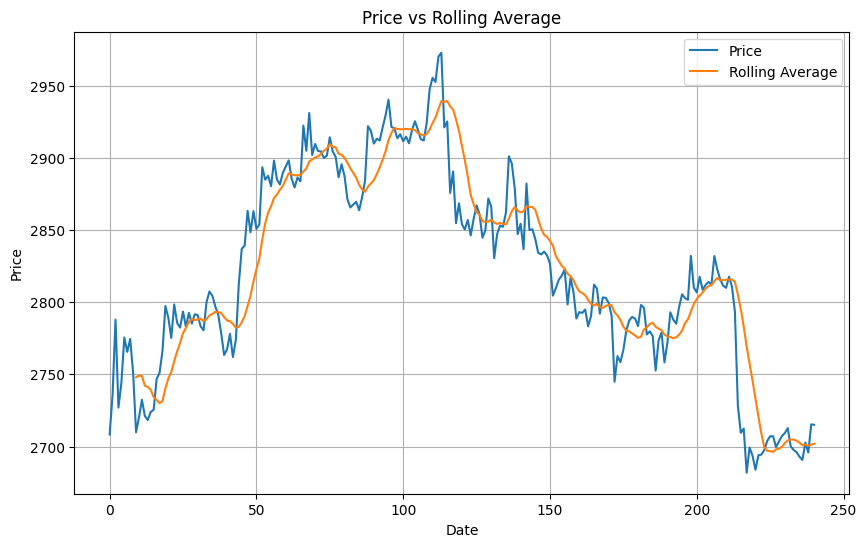

In [51]:
import matplotlib.pyplot as plt

# Assuming you have 'date' as the index of your DataFrame
plt.figure(figsize=(10, 6))
plt.plot(dfs.index, dfs['price'], label='Price')
plt.plot(dfs.index, dfs['rolling_avg_price'], label='Rolling Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price vs Rolling Average')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
def bearish_double_top(df):
    # A bearish double top pattern occurs when there are two consecutive peaks of nearly the same price
    # followed by a drop below the low of the intervening trough.
    # This is a simplified version and may need to be adjusted based on your specific needs.
    df['bearish_double_top'] = ((df['price'].shift(-1) > df['price']) & 
                                (df['price'].shift(1) > df['price']) & 
                                (df['price'].shift(-2) > df['price']))
    return df

df1_double_top = bearish_double_top(df1)


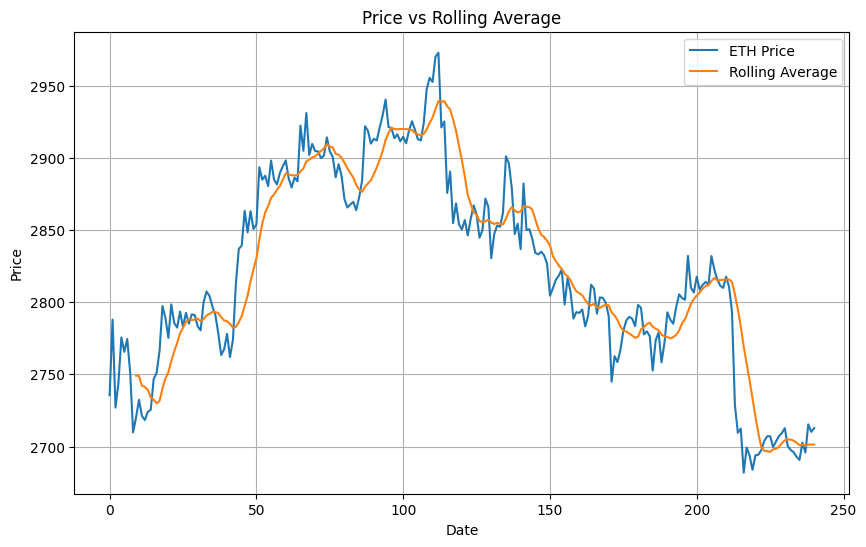

In [53]:
import matplotlib.pyplot as plt

# Assuming you have 'date' as the index of your DataFrame
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['price'], label='ETH Price')
plt.plot(df1_rolling.index, df1_rolling['rolling_avg_price'], label='Rolling Average')
# plt.plot(df1_double_top.index, df1_double_top['bearish_double_top'], label='Bearish double top')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price vs Rolling Average')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import mplfinance as mpf

def is_bearish_double_top(data):
    # Calculate the difference between consecutive highs
    diff = data['High'].diff()
    
    # Find where the difference changes sign
    peaks = diff.where((diff.shift(1) > 0) & (diff < 0)).notna()
    
    # Find potential double tops
    potential_double_tops = data['High'][peaks].rolling(window=2).apply(lambda x: abs(x[1] - x[0]) < 0.01, raw=True)
    
    # Check if the second top is followed by a decrease
    bearish_double_tops = potential_double_tops & (data['Close'].shift(-1) < data['Close'])
    
    return bearish_double_top

# Load your data
# data = pd.read_csv('your_data.csv')

# Detect bearish double top pattern
# bearish_double_tops = is_bearish_double_top(data)

# Print the result
# print(bearish_double_tops)
